In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path_cus = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 1 - Retail Case Study//"
file_name_cus = "Customer.csv"

file_path_trans = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 1 - Retail Case Study//"
file_name_trans = "Transactions.csv"

file_path_prod = "C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 1 - Retail Case Study//"
file_name_prod = "prod_cat_info.csv"

file_path_cus + file_name_cus
file_path_trans + file_name_trans
file_path_prod + file_name_prod

'C://previous laptop//PG_Certification_in_Data_Science//Classes - Term 2//2 Case Studies//3. Case studies (Four)//Case Study 1 - Retail Case Study//prod_cat_info.csv'

In [3]:
cust_main = pd.read_csv(file_path_cus + file_name_cus)
trans_main = pd.read_csv(file_path_trans + file_name_trans)
prod_main = pd.read_csv(file_path_prod + file_name_prod)

In [4]:
# keeping the main copy for as it is to avoid any mistakes
# will do all the analysis on created copy
cust = cust_main.copy()
trans = trans_main.copy()
prod = prod_main.copy()

In [5]:
cust.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [9]:
trans.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [10]:
prod.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [24]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [25]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [26]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [ ]:
# All above tables do not have null values and dtypes of the joining keys are matching
# We will using left join with trans table as left table (as mentioned in the question)

Q1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.

In [5]:
interim_table = pd.merge(left=trans, right=cust ,left_on='cust_id' ,right_on='customer_Id' ,how='left' ,suffixes=('t','c'))

In [7]:
interim_table.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0


In [6]:
customer_final = pd.merge(left=interim_table, right=prod, left_on=['prod_cat_code','prod_subcat_code'] ,right_on=['prod_cat_code','prod_sub_cat_code'] ,how='left' ,suffixes=('t','p'))

In [16]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY


In [7]:
#checking nulls
customer_final.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
customer_Id          0
DOB                  0
Gender               9
city_code            8
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [7]:
customer_final.dropna(inplace=True)

In [8]:
#checking duplicates
customer_final.duplicated().sum()

13

In [9]:
customer_final.drop_duplicates(inplace=True)

Q2. Prepare a summary report for the merged data set.

a. Get the column names and their corresponding data types

In [18]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23040 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23040 non-null  int64  
 1   cust_id            23040 non-null  int64  
 2   tran_date          23040 non-null  object 
 3   prod_subcat_code   23040 non-null  int64  
 4   prod_cat_code      23040 non-null  int64  
 5   Qty                23040 non-null  int64  
 6   Rate               23040 non-null  int64  
 7   Tax                23040 non-null  float64
 8   total_amt          23040 non-null  float64
 9   Store_type         23040 non-null  object 
 10  customer_Id        23040 non-null  int64  
 11  DOB                23040 non-null  object 
 12  Gender             23031 non-null  object 
 13  city_code          23032 non-null  float64
 14  prod_cat           23040 non-null  object 
 15  prod_sub_cat_code  23040 non-null  int64  
 16  prod_subcat        230

In [ ]:
# converting the datatype of tran_date and DOB to datetime

In [14]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'], dayfirst = True)

In [11]:
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format='%d-%m-%Y')

In [19]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23023 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23023 non-null  int64         
 1   cust_id            23023 non-null  int64         
 2   tran_date          23023 non-null  datetime64[ns]
 3   prod_subcat_code   23023 non-null  int64         
 4   prod_cat_code      23023 non-null  int64         
 5   Qty                23023 non-null  int64         
 6   Rate               23023 non-null  int64         
 7   Tax                23023 non-null  float64       
 8   total_amt          23023 non-null  float64       
 9   Store_type         23023 non-null  object        
 10  customer_Id        23023 non-null  int64         
 11  DOB                23023 non-null  datetime64[ns]
 12  Gender             23023 non-null  object        
 13  city_code          23023 non-null  float64       
 14  prod_c

b. Top/Bottom 10 observations

In [12]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,09-10-1982,F,6.0,Electronics,8,Personal Appliances
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,29-05-1981,M,9.0,Home and kitchen,11,Bath
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,21-04-1971,M,9.0,Home and kitchen,12,Tools
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,275108,04-11-1971,F,8.0,Clothing,3,Kids
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,27-11-1979,F,3.0,Electronics,8,Personal Appliances


In [13]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,271982,10-08-1976,M,8.0,Books,10,Non-Fiction
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,273982,12-10-1991,M,4.0,Electronics,4,Mobiles
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,273031,17-01-1980,F,8.0,Books,6,DIY
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,272049,28-06-1975,F,6.0,Home and kitchen,11,Bath
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,266866,18-04-1974,M,4.0,Footwear,4,Kids
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0,Books,11,Children


c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [16]:
customer_final.describe(exclude=['object','datetime'])

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
count,2.302300e+04,23023.000000,23023.000000,23023.000000,23023.000000,23023.000000,23023.000000,23023.000000,23023.000000,23023.000000,23023.000000
mean,5.006567e+10,271023.477479,6.148677,3.763497,2.435868,637.116840,248.701263,2109.881471,271023.477479,5.483734,6.148677
std,2.898451e+10,2431.354328,3.726186,1.677049,2.264415,621.870539,187.196950,2505.929444,2431.354328,2.863422,3.726186
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000,1.000000
25%,2.492136e+10,268937.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268937.000000,3.000000,3.000000
50%,5.008910e+10,270981.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270981.000000,5.000000,5.000000
75%,7.532499e+10,273115.500000,10.000000,5.000000,4.000000,1110.000000,365.820000,3570.255000,273115.500000,8.000000,10.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000,12.000000


d. Frequency tables for all the categorical variables

In [12]:
customer_final.select_dtypes(include='object').columns

Index(['Store_type', 'Gender', 'prod_cat', 'prod_subcat'], dtype='object')

In [13]:
customer_final['Store_type'].value_counts()

e-Shop            9299
MBR               4658
Flagship store    4573
TeleShop          4493
Name: Store_type, dtype: int64

In [39]:
pd.DataFrame(customer_final[['Store_type']].groupby('Store_type').value_counts())

,0
Store_type,
Flagship store,4573
MBR,4658
TeleShop,4493
e-Shop,9299


In [13]:
pd.DataFrame(customer_final[['Gender']].groupby('Gender').value_counts())

,0
Gender,
F,11225
M,11798


In [14]:
pd.DataFrame(customer_final[['prod_cat']].groupby('prod_cat').value_counts())

,0
prod_cat,
Bags,1996
Books,6061
Clothing,2957
Electronics,4891
Footwear,2995
Home and kitchen,4123


In [15]:
pd.DataFrame(customer_final[['prod_subcat']].groupby('prod_subcat').value_counts())

,0
prod_subcat,
Academic,966
Audio and video,951
Bath,1020
Cameras,984
Children,1034
Comics,1030
Computers,956
DIY,988
Fiction,1042


Q3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [35]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23023 entries, 0 to 23052
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23023 non-null  int64         
 1   cust_id            23023 non-null  int64         
 2   tran_date          23023 non-null  datetime64[ns]
 3   prod_subcat_code   23023 non-null  int64         
 4   prod_cat_code      23023 non-null  int64         
 5   Qty                23023 non-null  int64         
 6   Rate               23023 non-null  int64         
 7   Tax                23023 non-null  float64       
 8   total_amt          23023 non-null  float64       
 9   Store_type         23023 non-null  object        
 10  customer_Id        23023 non-null  int64         
 11  DOB                23023 non-null  datetime64[ns]
 12  Gender             23023 non-null  object        
 13  city_code          23023 non-null  float64       
 14  prod_c

In [47]:
def plot_creator(var):
    if (var.dtype == 'int64') | (var.dtype == 'float64'):
        plt.figure(figsize=(10,6))
        var_chart = sns.histplot(var, bins=5)
        plt.title("Histogram for " + var.name)
        plt.show()
        return var_chart
    elif var.dtype == 'object':
        plt.figure(figsize=(10,6))
        var_chart = sns.displot(var, bins=5, kde=True)
        plt.title("Distribution for " + var.name)
        plt.show()
        return var_chart

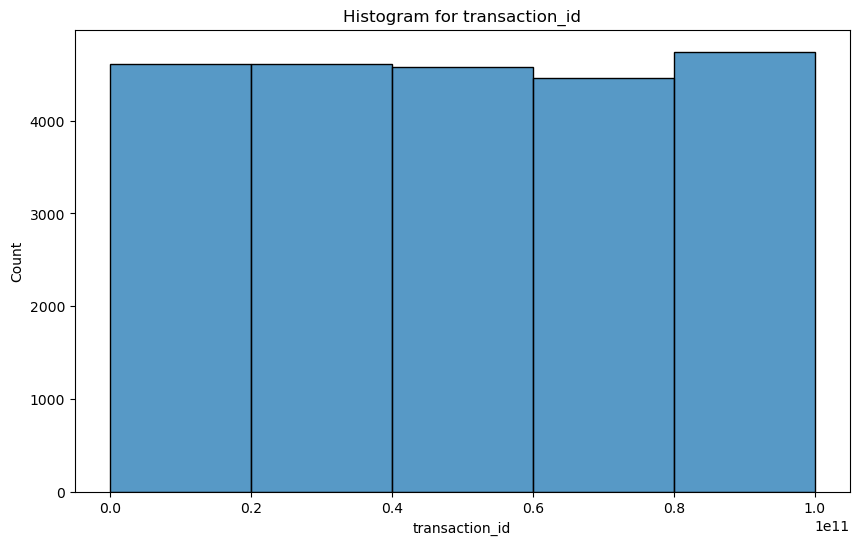

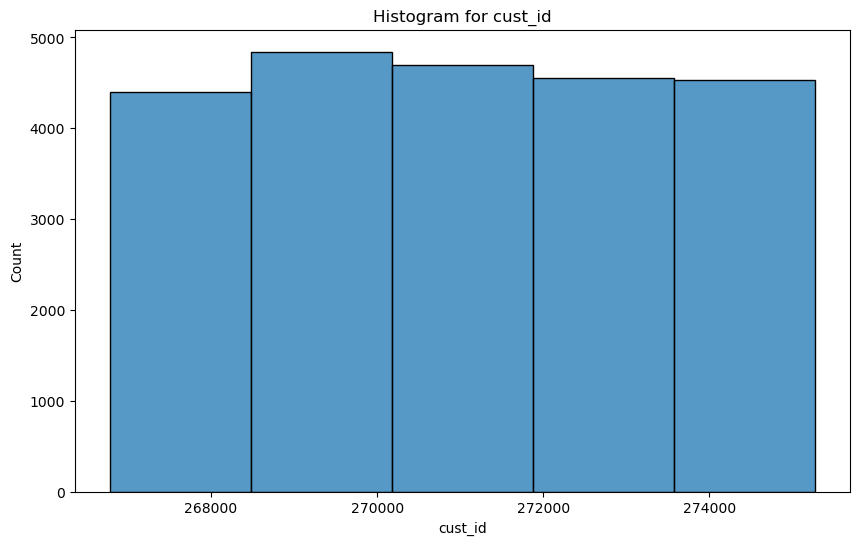

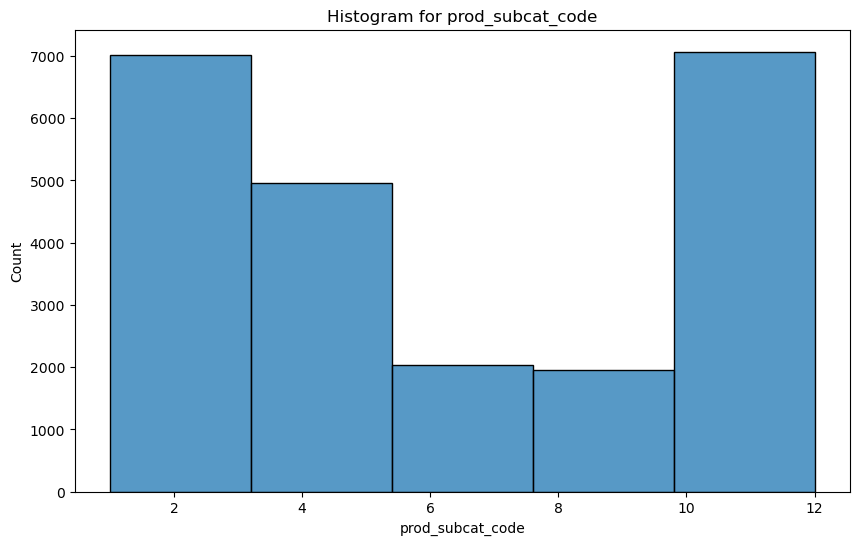

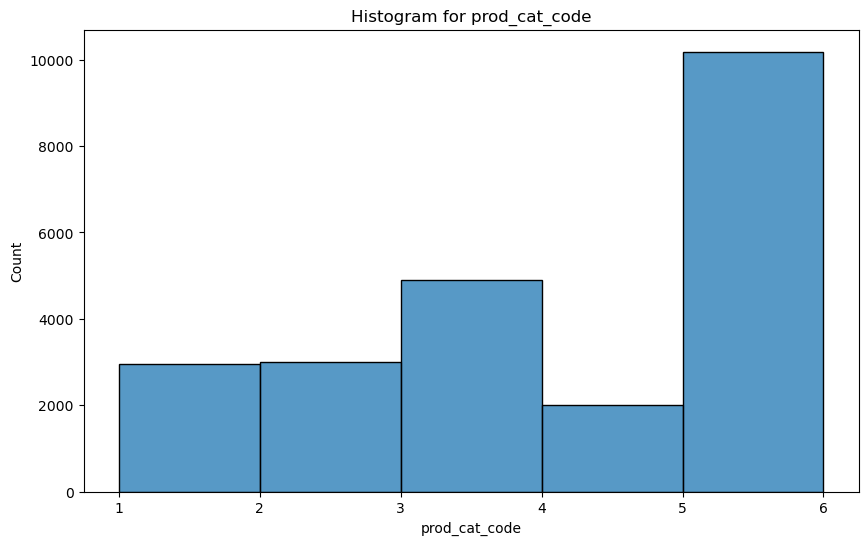

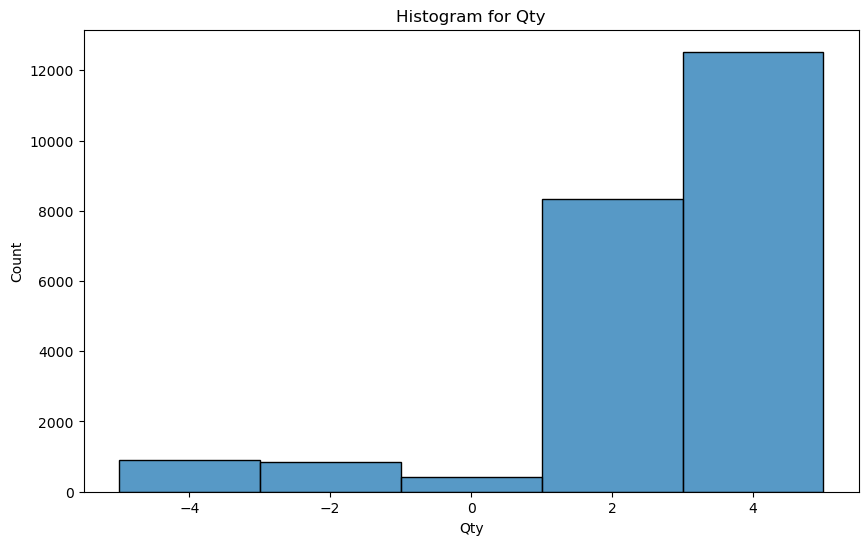

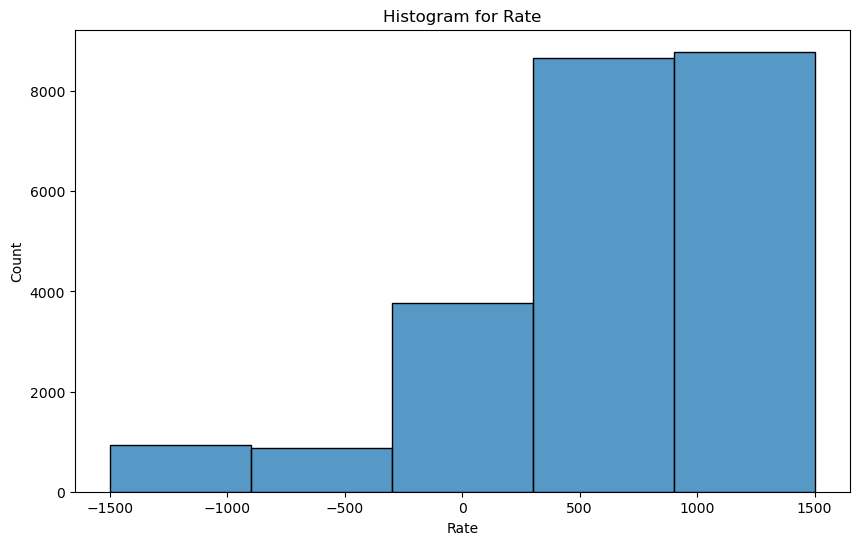

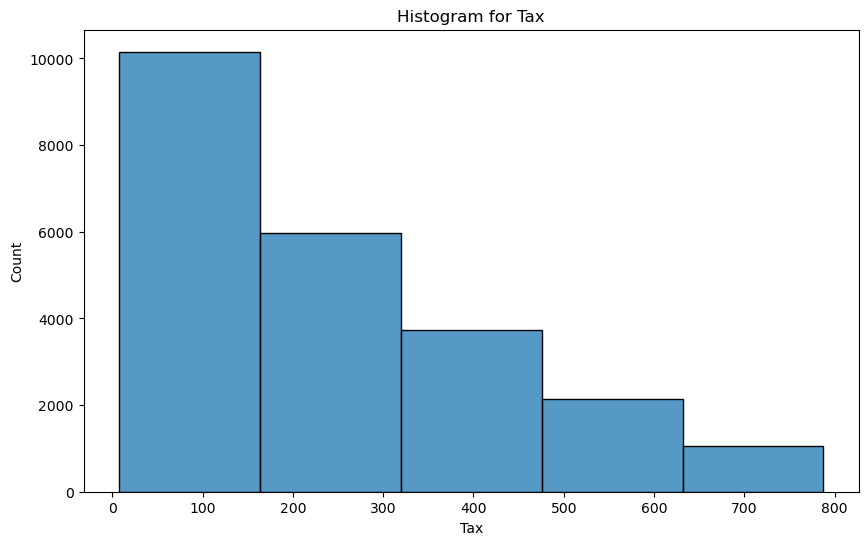

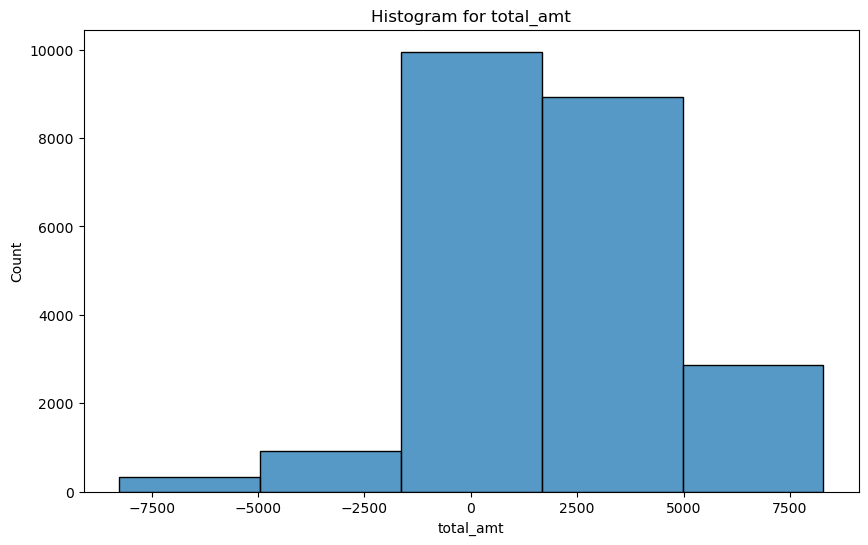

<Figure size 1000x600 with 0 Axes>

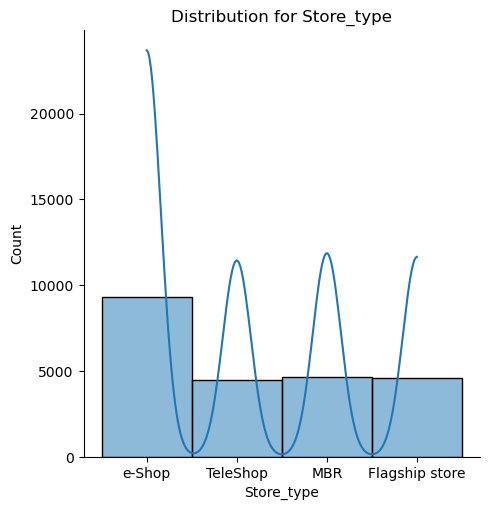

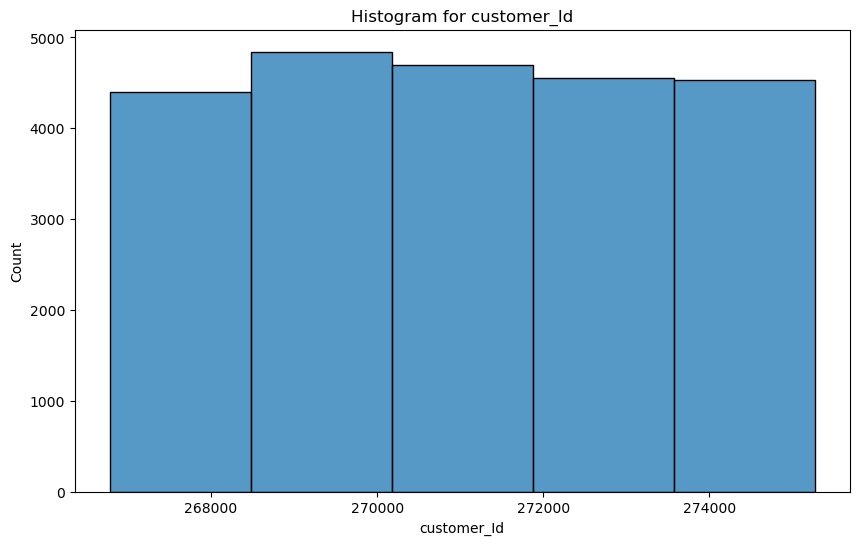

<Figure size 1000x600 with 0 Axes>

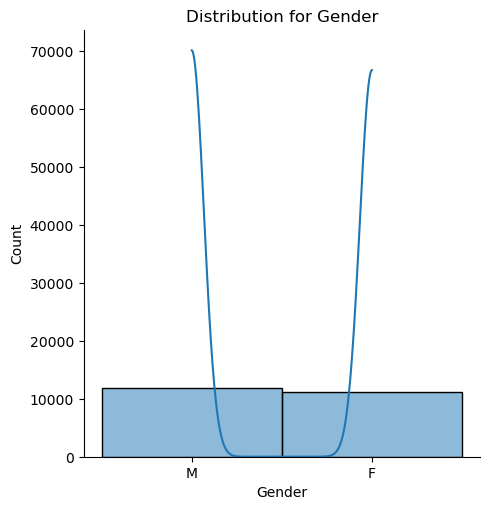

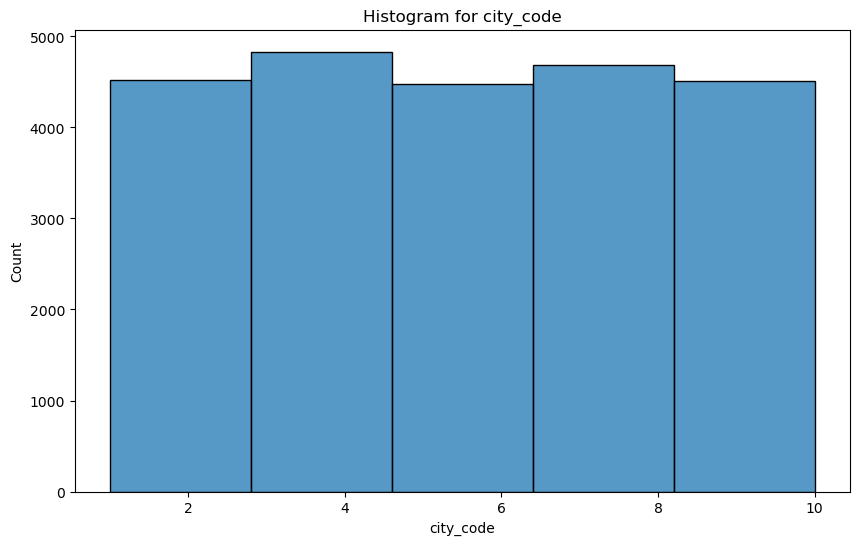

<Figure size 1000x600 with 0 Axes>

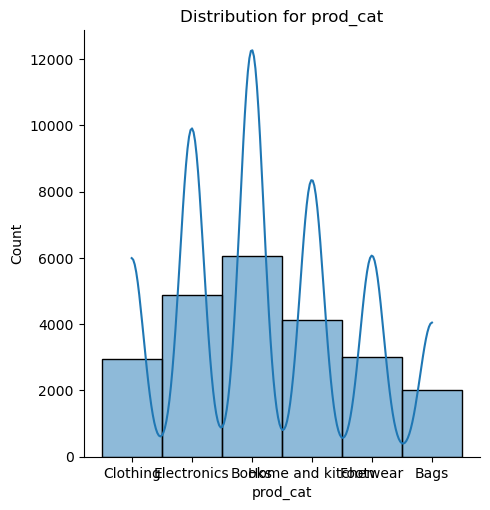

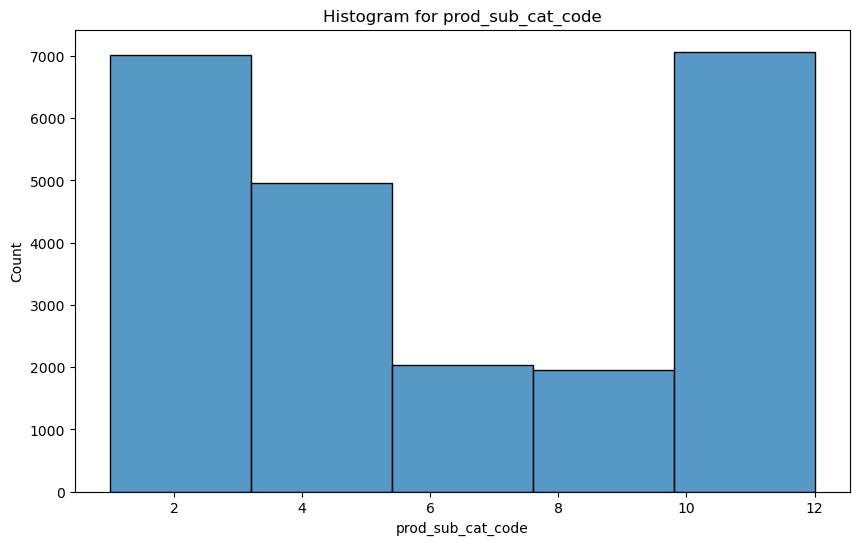

<Figure size 1000x600 with 0 Axes>

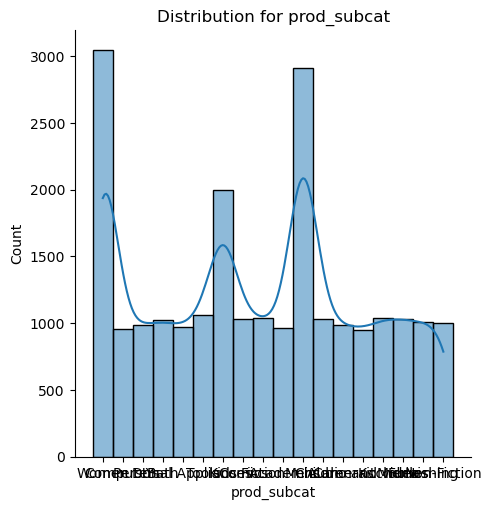

In [48]:
customer_final.apply(plot_creator)
plt.show()

Q4. Calculate the following information using the merged dataset :



a. Time period of the available transaction data

In [15]:
customer_final['tran_date'].max() - customer_final['tran_date'].min()

Timedelta('1430 days 00:00:00')

b. Count of transactions where the total amount of transaction was negative

In [20]:
customer_final[customer_final['total_amt']< 0]['total_amt'].count()

2163

In [ ]:
5. Analyze which product categories are more popular among females vs male customers.

In [26]:
customer_final.groupby(['Gender','prod_cat'])[['transaction_id']].count().sort_values(by='transaction_id', ascending = False)

transaction_id
Gender prod_cat                        
M      Books                       3115
F      Books                       2946
M      Electronics                 2565
F      Electronics                 2326
M      Home and kitchen            2130
F      Home and kitchen            1993
       Footwear                    1528
M      Clothing                    1518
       Footwear                    1467
F      Clothing                    1439
M      Bags                        1003
F      Bags                         993

In [ ]:
6. Which City code has the maximum customers and what was the percentage of customers from
that city?

In [20]:
series6 = customer_final.groupby('city_code')[['city_code']].value_counts()

In [21]:
series6

city_code
1.0     2255
2.0     2263
3.0     2410
4.0     2422
5.0     2357
6.0     2123
7.0     2356
8.0     2328
9.0     2176
10.0    2333
dtype: int64

In [22]:
series6.idxmax()

4.0

In [24]:
(series6.max()/series6.sum())*100

10.519914867740955

In [ ]:
7. Which store type sells the maximum products by value and by quantity?

In [27]:
customer_final.groupby('Store_type')[[
    'Store_type','total_amt']].agg({'total_amt':np.sum}).sort_values(by='total_amt',ascending=False)

,total_amt
Store_type,
e-Shop,1.983894e+07
Flagship store,9.720710e+06
MBR,9.667756e+06
TeleShop,9.348391e+06


In [26]:
customer_final.groupby('Store_type')[[
    'Store_type','Qty']].agg({'Qty':np.sum}).sort_values(by='Qty',ascending=False)

,Qty
Store_type,
e-Shop,22785
MBR,11188
Flagship store,11140
TeleShop,10968


In [ ]:
8. What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?

In [27]:
table8 = customer_final[((customer_final['prod_cat']=="Electronics") | (customer_final['prod_cat']=="Clothing")) & (customer_final['Store_type']=="Flagship store")]

In [28]:
table8['total_amt'].sum()

3408936.0500000003

In [ ]:
9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [101]:
table9 = customer_final[(customer_final['prod_cat']=="Electronics") & (customer_final['Gender']=='M')]

In [102]:
table9['total_amt'].sum()

5711351.62

In [ ]:
10. How many customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts?

In [30]:
table10 = customer_final[customer_final['total_amt']>0]

In [39]:
series10 = table10[['cust_id']].groupby('cust_id')[['cust_id']].value_counts()

In [41]:
series10[series10>10].size

6

In [ ]:
11. For all customers aged between 25 - 35, find out:
a. What was the total amount spent for “Electronics” and “Books” product categories?
b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [36]:
# know the range of customer date of birth
customer_final['DOB'].sort_values() 

10951   1970-01-02
10178   1970-01-02
1403    1970-01-02
7938    1970-01-02
1477    1970-01-02
           ...    
17602   1992-12-27
19793   1992-12-27
11006   1992-12-29
9999    1992-12-29
12268   1992-12-29
Name: DOB, Length: 23023, dtype: datetime64[ns]

In [ ]:
# lets consider date 1/1/2020 to find the age of customer
# found the approach to find date difference in years on stackoverflow -- np.timedelta64(1,'Y')

In [44]:
customer_final['age_years'] = customer_final[['DOB']].applymap(lambda x: pd.to_datetime('01-01-2020') - x) / np.timedelta64(1,'Y')

In [62]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,age_years
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women,38.264988
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-05-11,F,8.0,Electronics,5,Computers,46.642984
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY,27.431090
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-06-08,M,3.0,Home and kitchen,11,Bath,38.566158
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY,27.431090


In [63]:
table11 = customer_final[(customer_final['age_years']>25) & (customer_final['age_years']<35)]

In [64]:
table11[(table11['prod_cat']=='Electronics') | (table11['prod_cat']=='Books')][['total_amt']].sum()

total_amt    8171921.42
dtype: float64

In [65]:
table11[(table11['tran_date'] >= pd.to_datetime('01-01-2014')) | (table11['tran_date'] <=pd.to_datetime('01-03-2014'))][['total_amt']].sum()

total_amt    17103296.08
dtype: float64